# Sales Analysis Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_feather(r"E:\Python Project\Sales_data.ftr")

In [3]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
df.shape

(186850, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
print(df['Product'].unique())


['USB-C Charging Cable' None 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']


### Data Cleaning

In [8]:
## checking out total missing values we have
df.isnull().sum()  

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df =df.dropna(how="all")

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
## checking duplicates
df.duplicated().sum()

618

In [12]:
df = df.drop_duplicates() 

In [13]:
df.shape

(185687, 6)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [16]:
df[df['Order ID'].isna()]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,NaN,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
df.drop(519, inplace=True)


In [18]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df['Order ID'] = df['Order ID'].astype('Int64')

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [22]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [23]:
df['Price Each'] = df['Price Each'].astype(float)

In [24]:
df.dtypes

Order ID                     Int64
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## 1..What is the total revenue generated during the period?

In [25]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
total_revenue = df['Total Sales'].sum()
total_revenue 

34465537.94

## 2..What is the average order value (AOV) during the period covered by the dataset?

In [26]:
total_orders = df['Order ID'].nunique()
total_orders

178437

In [27]:
aov=round(total_revenue / total_orders,2)
aov

193.15

## 3.. Which is the best month for sale ?

In [28]:
df['month'] = df['Order Date'].dt.month

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [30]:
df['month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [31]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99


In [33]:
df.groupby(['month'])['sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<AxesSubplot:xlabel='month'>

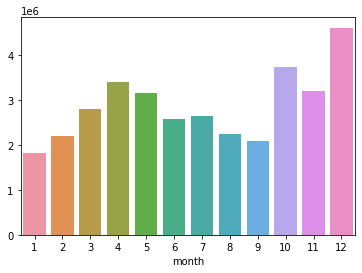

In [34]:
month_sales=df.groupby(['month'])['sales'].sum()
sns.barplot(x=month_sales.index, y=month_sales.values)

### December is the best month of sales


## 4..Is there any relationship between the day of the week and sales volume?

In [35]:
df['Day of Week'] = df['Order Date'].dt.day_name()

In [36]:
df['Day of Week']

0           Friday
2           Sunday
3           Friday
4           Friday
5          Tuesday
            ...   
186845     Tuesday
186846      Sunday
186847      Monday
186848    Thursday
186849      Monday
Name: Day of Week, Length: 185686, dtype: object

In [37]:
day_sales = df.groupby(df['Order Date'].dt.day_name())['Total Sales'].sum()

day_order = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

day_sales = day_sales.reindex(day_order)
day_sales 

Order Date
Saturday     4900195.58
Sunday       4927249.40
Monday       4877588.21
Tuesday      5086275.40
Wednesday    4986823.36
Thursday     4833763.73
Friday       4853642.26
Name: Total Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

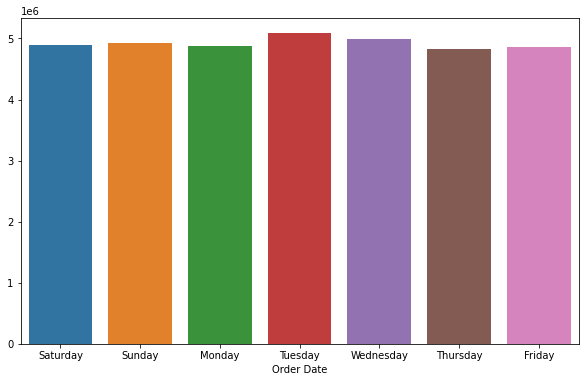

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values)


<AxesSubplot:xlabel='Order Date'>

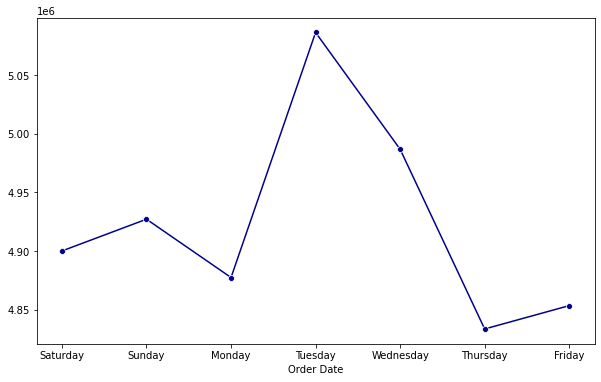

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_sales.index, y=day_sales.values, marker='o',color='darkblue')

### Tuesday tends to have the highest sales volume while Thursday and Friday typically have the lowest sales volumes.

## 5.. Which city has max order ? 

In [40]:
df['city'] = df['Purchase Address'].str.split(',').str[1].str.strip()

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,month,sales,Day of Week,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,Friday,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,Sunday,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,Friday,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,Friday,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,Tuesday,Los Angeles


In [42]:
df.groupby(['city'])['Quantity Ordered'].sum().sort_values(ascending=False)

city
San Francisco    50169
Los Angeles      33247
New York City    27903
Boston           22494
Dallas           16707
Atlanta          16584
Seattle          16534
Portland         14037
Austin           11137
Name: Quantity Ordered, dtype: int32

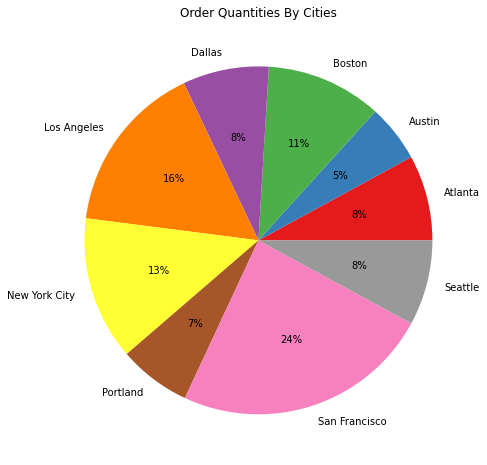

In [43]:
plt.figure(figsize=(8,8))
df.groupby(['city'])['Quantity Ordered'].sum().plot(kind='pie' , autopct = '%1.0f%%',colors=sns.color_palette('Set1'))
plt.ylabel('')
plt.title('Order Quantities By Cities')
plt.show()

### The city with the maximum number of orders is San Francisco.

## 6.. What is the busiest Time of the Day?

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
busiest_hours=df.groupby('Hour').size()
busiest_hours


Hour
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
dtype: int64

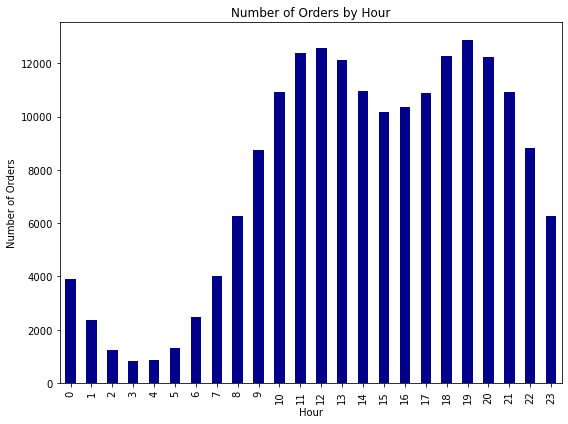

In [45]:
plt.figure(figsize=(8,6))
busiest_hours.plot(kind='bar', color='Darkblue')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### The busiest time of the day is at 12:00 PM (noon) indicating a peak in activity during midday.

## 7.. What product sold the most &  Why?

In [46]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Total Sales', 'month', 'sales', 'Day of Week',
       'city', 'Hour'],
      dtype='object')

In [47]:
count_df=df.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values(by='Quantity Ordered',ascending=False)
count_df = count_df.reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),30986,2.99
1,AA Batteries (4-pack),27615,3.84
2,USB-C Charging Cable,23931,11.95
3,Lightning Charging Cable,23169,14.95
4,Wired Headphones,20524,11.99
5,Apple Airpods Headphones,15637,150.00
6,Bose SoundSport Headphones,13430,99.99
7,27in FHD Monitor,7541,149.99
8,iPhone,6847,700.00
9,27in 4K Gaming Monitor,6239,389.99


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5516\979580451.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(count_df['Product'], rotation='vertical', fontsize=8)


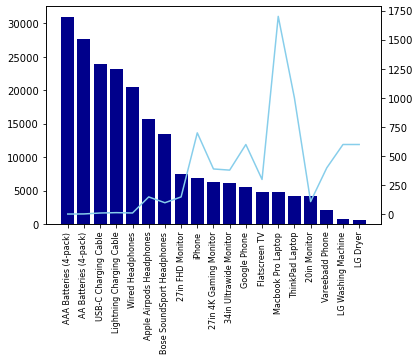

In [48]:
products = count_df['Product'].values

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='darkblue')  
ax2.plot(count_df['Product'], count_df['Price Each'], color='skyblue')
ax1.set_xticklabels(count_df['Product'], rotation='vertical', fontsize=8)
plt.show()

### The AAA Batteries (4-pack) is the highest selling product, and it also boasts the lowest price.

## 8.. Understanding Trend of the most sold product ? 

In [49]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

top_products = product_sales.sort_values(ascending=False).head(5) 
top_products


Product
AAA Batteries (4-pack)      30986
AA Batteries (4-pack)       27615
USB-C Charging Cable        23931
Lightning Charging Cable    23169
Wired Headphones            20524
Name: Quantity Ordered, dtype: int32

In [50]:
df_top_products = df[df['Product'].isin(top_products.index)]

crosstab_top_products = pd.crosstab(df_top_products['month'], df_top_products['Product'])
crosstab_top_products

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


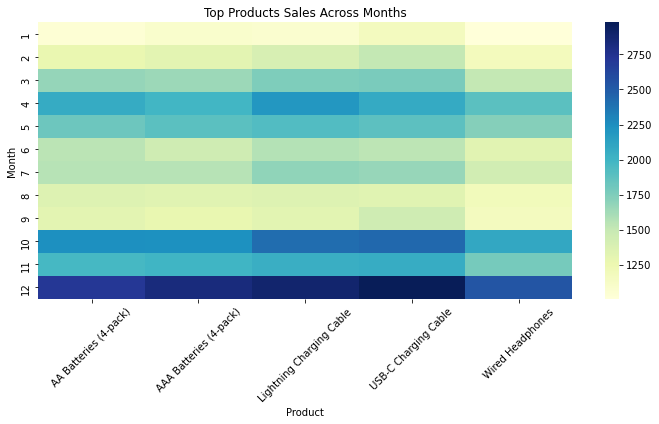

In [51]:
plt.figure(figsize=(10, 6))  
sns.heatmap(crosstab_top_products, cmap="YlGnBu") 
plt.title('Top Products Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

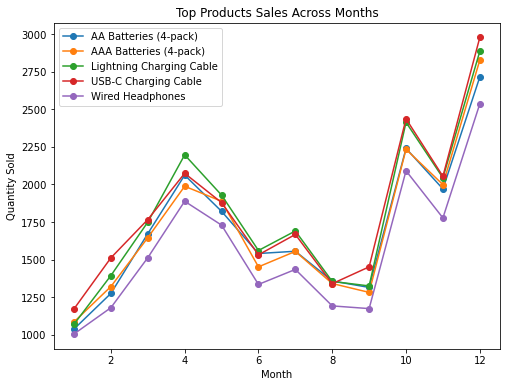

In [52]:
plt.figure(figsize=(8, 6)) 
for product in crosstab_top_products.columns[:5]:
    plt.plot(crosstab_top_products.index, crosstab_top_products[product], marker='o', label=product)
    
plt.title('Top Products Sales Across Months')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend() 
plt.show()

### December has the most sales.

## 9.. What products are most often sold together (same order Id) ?

In [53]:
df_duplicated=df[df['Order ID'].duplicated(keep=False)]

In [54]:
df_duplicated.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,month,sales,Day of Week,city,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,Friday,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,Friday,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,600.00,Wednesday,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,11.95,Wednesday,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,4,5.98,Wednesday,San Francisco,17
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,4,600.00,Wednesday,San Francisco,17


In [55]:
from itertools import combinations
from collections import Counter

In [56]:
grouped = df.groupby('Order ID')['Product'].apply(list)

product_combinations = Counter()

for products in grouped:
    product_combinations.update(combinations(products, 2)) 

most_common_combinations = product_combinations.most_common(5)
most_common_combinations

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

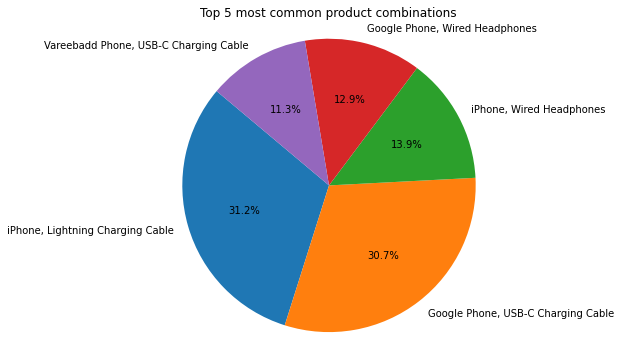

In [57]:
labels = [', '.join(combination) for combination, _ in most_common_combinations]
sizes = [count for _, count in most_common_combinations]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 5 most common product combinations')
plt.show()

### The products "iPhone" and "Lightning Charging Cable" are most often sold together